In [8]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
all_data = pd.read_excel("/content/drive/MyDrive/Telecommunication-Industry-Analysis/teleco_excel_file.xlsx")

# all_data.head()
# pd.set_option('display.max_columns', 50)

In [11]:
# all_data.columns.tolist()

In [12]:
print(f" There are {all_data.shape[0]} rows and {all_data.shape[1]} columns")

 There are 150001 rows and 55 columns


##### Dealing with missing values

In [13]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telco dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(all_data)

The telco dataset contains 12.5 % missing values.


In [14]:
all_data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### showing the missing columns

In [15]:
# Now which column(s) has missing values
# all_data.isna().sum()

In [16]:
fd = pd.DataFrame(all_data)


In [17]:
df = fd.drop(['IMSI', 'IMEI','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [18]:
df.iloc[:5 , 0:10]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),MSISDN/Number,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,3.366496e+10,9164566995485190,42.0,5.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,3.368185e+10,L77566A,65.0,5.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,3.376063e+10,D42335A,NaN,NaN
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,3.375034e+10,T21824A,NaN,NaN
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,3.369980e+10,D88865A,NaN,NaN


In [19]:
df["Bearer Id"] = df["Bearer Id"].fillna(df["Bearer Id"].mode()[0])

In [20]:
df["Start"] = df["Start"].fillna(method='ffill')

In [21]:
df["Start ms"] = df["Start ms"].fillna(method='ffill')

In [22]:
df["End"] = df["End"].fillna(method='ffill')

In [23]:
df["End ms"] = df["End ms"].fillna(method='ffill')

In [24]:
df["Dur. (ms)"] = df["Dur. (ms)"].fillna(method='ffill')

In [25]:
df["Total UL (Bytes)"] = df["Total UL (Bytes)"].fillna(df["Total UL (Bytes)"].mode()[0])

In [26]:
df["Total DL (Bytes)"] = df["Total UL (Bytes)"].fillna(df["Total DL (Bytes)"].mode()[0])

In [27]:
df["Nb of sec with Vol DL < 6250B"] = df["Nb of sec with Vol DL < 6250B"].fillna(df["Nb of sec with Vol DL < 6250B"].mode()[0]) 

In [28]:
df["Nb of sec with Vol UL < 1250B"] = df["Nb of sec with Vol UL < 1250B"].fillna(df["Nb of sec with Vol UL < 1250B"].mode()[0])
df["MSISDN/Number"] = df["MSISDN/Number"].fillna(df["MSISDN/Number"].mode()[0])
df["Avg RTT DL (ms)"] = df["Avg RTT DL (ms)"].fillna(df["Avg RTT DL (ms)"].mode()[0])
df["Avg RTT UL (ms)"] = df["Avg RTT UL (ms)"].fillna(df["Avg RTT UL (ms)"].mode()[0])
df["Avg Bearer TP DL (kbps)"] = df["Avg Bearer TP DL (kbps)"].fillna(df["Avg Bearer TP DL (kbps)"].mode()[0])
df["Avg Bearer TP UL (kbps)"] = df["Avg Bearer TP UL (kbps)"].fillna(df["Avg Bearer TP UL (kbps)"].mode()[0])
df["Activity Duration DL (ms)"] = df["Activity Duration DL (ms)"].fillna(df["Activity Duration DL (ms)"].mode()[0])
df["Activity Duration UL (ms)"] = df["Activity Duration UL (ms)"].fillna(df["Activity Duration UL (ms)"].mode()[0])
df["Dur. (ms).1"] = df["Dur. (ms).1"].fillna(df["Dur. (ms).1"].mode()[0])

In [29]:
df["Handset Manufacturer"] = df["Handset Manufacturer"].fillna(value='undefined')
df["Handset Type"] = df["Handset Type"].fillna(value='undefined')
df["Last Location Name"] = df["Last Location Name"].fillna(value='undefined')

In [30]:
df = df.fillna(value=0)

In [31]:
# df.isna().sum()

In [32]:
# df["Nb of sec with Vol DL < 6250B"].isna().sum()

## Extracting Data

### Handset type and manufacures

In [33]:
ht = df["Handset Type"].value_counts()
ht.head(10)

Huawei B528S-23A                19752
undefined                        9559
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [34]:
hm = df["Handset Manufacturer"].value_counts()
hm.head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [35]:
Manu_grp = df.groupby(["Handset Manufacturer"])
Manu_grp.get_group('Apple').iloc[:1 , 20:40]

,Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes)
22,20070.0,79273.0,723714634.0,Apple,Apple iPhone 6S (A1688),132.0,245.0,759834.0,47429.0,10830083.0,2924712.0,1781218.0,375213.0,5171749.0,16522963.0,19868319.0,9877484.0,536129472.0,4566629.0,450624422.0


In [36]:
Manu_grp['Handset Type'].value_counts().loc['Apple'].head(5)

Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [37]:
Manu_grp['Handset Type'].value_counts().loc['Samsung'].head(5)

Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [38]:
Manu_grp['Handset Type'].value_counts().loc['Huawei'].head(5)

Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

### interpretation and recommendation to marketing teams
The data between Handset Manufacturer and Handset Type shows that most of the users from the sample data use the manufacturer Apple product


In [39]:
df["MSISDN/Number"].value_counts()

3.362632e+10    1084
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.376054e+10      15
                ... 
3.368998e+10       1
3.376372e+10       1
3.360748e+10       1
3.369955e+10       1
3.361962e+10       1
Name: MSISDN/Number, Length: 106856, dtype: int64

In [40]:
User_grp = df.groupby(["MSISDN/Number"])
# User_grp.get_group('3.362632e+10')

In [41]:
User_grp['Bearer Id'].value_counts()

MSISDN/Number  Bearer Id   
3.360100e+10   1.311448e+19    1
               7.349883e+18    1
               7.349883e+18    1
3.360101e+10   1.304243e+19    1
               7.277826e+18    1
                              ..
3.379000e+10   1.304243e+19    1
               1.311448e+19    1
3.197021e+12   7.277826e+18    1
3.370000e+14   7.349883e+18    1
8.823971e+14   7.277826e+18    1
Name: Bearer Id, Length: 147958, dtype: int64

In [42]:
User_grp['Bearer Id'].median()

MSISDN/Number
3.360100e+10    1.311448e+19
3.360100e+10    7.349883e+18
3.360100e+10    7.349883e+18
3.360101e+10    1.304243e+19
3.360101e+10    7.313854e+18
                    ...     
3.379000e+10    1.304243e+19
3.379000e+10    1.311448e+19
3.197021e+12    7.277826e+18
3.370000e+14    7.349883e+18
8.823971e+14    7.277826e+18
Name: Bearer Id, Length: 106856, dtype: float64

In [43]:
User_grp['Bearer Id'].mean()

MSISDN/Number
3.360100e+10    1.311448e+19
3.360100e+10    7.349883e+18
3.360100e+10    7.349883e+18
3.360101e+10    1.304243e+19
3.360101e+10    7.313854e+18
                    ...     
3.379000e+10    1.304243e+19
3.379000e+10    1.311448e+19
3.197021e+12    7.277826e+18
3.370000e+14    7.349883e+18
8.823971e+14    7.277826e+18
Name: Bearer Id, Length: 106856, dtype: float64

In [44]:
User_grp["MSISDN/Number"].agg(['median', 'mean'])

,median,mean
MSISDN/Number,,
3.360100e+10,3.360100e+10,3.360100e+10
3.360100e+10,3.360100e+10,3.360100e+10
3.360100e+10,3.360100e+10,3.360100e+10
3.360101e+10,3.360101e+10,3.360101e+10
3.360101e+10,3.360101e+10,3.360101e+10
...,...,...
3.379000e+10,3.379000e+10,3.379000e+10
3.379000e+10,3.379000e+10,3.379000e+10
3.197021e+12,3.197021e+12,3.197021e+12


In [45]:
User_grp['Dur. (ms)'].value_counts()

MSISDN/Number  Dur. (ms)
3.360100e+10   116720.0     1
               181230.0     1
               134969.0     1
3.360101e+10   49878.0      1
               18549.0      1
                           ..
3.379000e+10   8810.0       1
               140988.0     1
3.197021e+12   877385.0     1
3.370000e+14   253030.0     1
8.823971e+14   869844.0     1
Name: Dur. (ms), Length: 142480, dtype: int64

### number of xDR sessions and Session duration per user



In [1]:
Userstot_grp = df.groupby(["MSISDN/Number"])

NameError: ignored

In [ ]:
Userstot_grp["Bearer Id"].value_counts().head()

In [ ]:
Userstot_grp["Dur. (ms)"].value_counts().head()

The total data volume (in Bytes) during this session for each application

In [46]:
Users_grp = df.groupby(["MSISDN/Number", "Social Media DL (Bytes)" , 'Google DL (Bytes)', 'Email DL (Bytes)' ,'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'])

In [47]:
Users_grp['Total UL (Bytes)'].value_counts().head()

MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  Gaming DL (Bytes)  Other DL (Bytes)  Total UL (Bytes)
3.360100e+10   2206504.0                3337123.0          837400.0          14900201.0          10265105.0          811091133.0        377096990.0       36053108.0          1
               2598548.0                4197697.0          2828821.0         5324251.0           770569.0            105035298.0        279557701.0       36104459.0          1
               3148004.0                3343483.0          2436500.0         2137272.0           16525919.0          529068485.0        495086501.0       39306820.0          1
3.360101e+10   251469.0                 5937765.0          2178618.0         4393123.0           1157362.0           388074835.0        25248001.0        20327526.0          1
               1359904.0                6309062.0          979859.0          8027633.0           21177155.0          50924332

In [48]:
Users_grp['Total DL (Bytes)'].value_counts().head(5)

MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  Gaming DL (Bytes)  Other DL (Bytes)  Total DL (Bytes)
3.360100e+10   2206504.0                3337123.0          837400.0          14900201.0          10265105.0          811091133.0        377096990.0       36053108.0          1
               2598548.0                4197697.0          2828821.0         5324251.0           770569.0            105035298.0        279557701.0       36104459.0          1
               3148004.0                3343483.0          2436500.0         2137272.0           16525919.0          529068485.0        495086501.0       39306820.0          1
3.360101e+10   251469.0                 5937765.0          2178618.0         4393123.0           1157362.0           388074835.0        25248001.0        20327526.0          1
               1359904.0                6309062.0          979859.0          8027633.0           21177155.0          50924332

In [49]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.015806e+19,499.189512,498.799735,1.046085e+05,4.182414e+10,94.620523,15.315031,13299.957414,1770.417111,92.378057,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112106e+07,4.112106e+07
std,2.893178e+18,288.611320,288.097034,8.103735e+04,2.438731e+12,560.245617,76.687998,23971.823147,4625.342240,14.568754,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127649e+07,1.127649e+07
min,6.917538e+18,0.000000,0.000000,7.142000e+03,3.360100e+10,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,2.866892e+06
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,3.365094e+10,28.000000,3.000000,43.000000,47.000000,90.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322196e+07,3.322196e+07
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,3.366361e+10,38.000000,5.000000,63.000000,63.000000,100.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.114324e+07
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,3.368307e+10,62.000000,11.000000,19710.000000,1120.000000,100.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,4.903424e+07
max,1.318654e+19,999.000000,999.000000,1.859336e+06,8.823971e+14,96923.000000,7120.000000,378160.000000,58613.000000,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,7.833131e+07


## Data Exploration

In [50]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(22, 12))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


###Univariate Analysis

Graphical


In [ ]:
plot_hist(df, "Bearer Id", "red")

In [ ]:
df["Bearer Id"].describe()

In [ ]:
plot_hist(df, "Dur. (ms)", "yellow")

In [ ]:
df['Dur. (ms)'].describe()

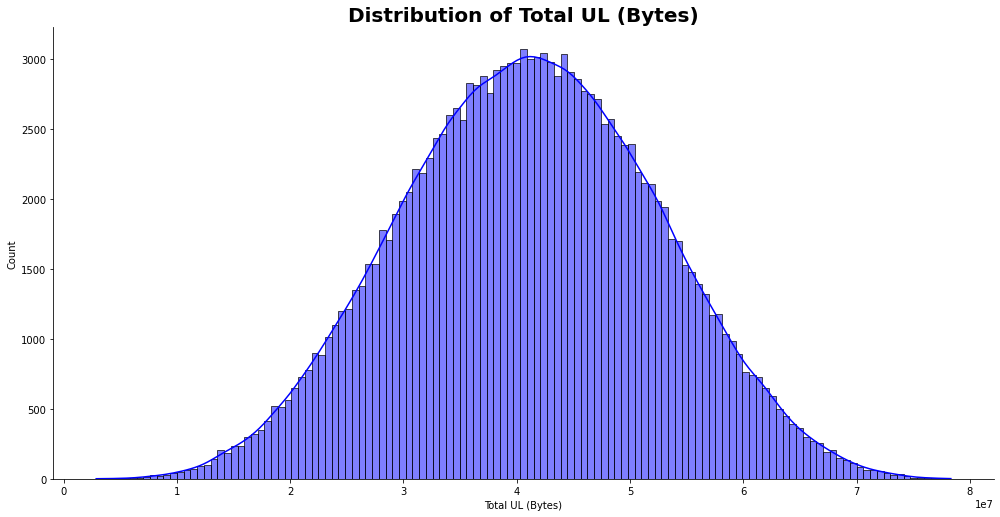

In [51]:
plot_hist(df, "Total UL (Bytes)", "blue")

In [52]:
df["Total UL (Bytes)"].describe()

count    1.500010e+05
mean     4.112106e+07
std      1.127649e+07
min      2.866892e+06
25%      3.322196e+07
50%      4.114324e+07
75%      4.903424e+07
max      7.833131e+07
Name: Total UL (Bytes), dtype: float64

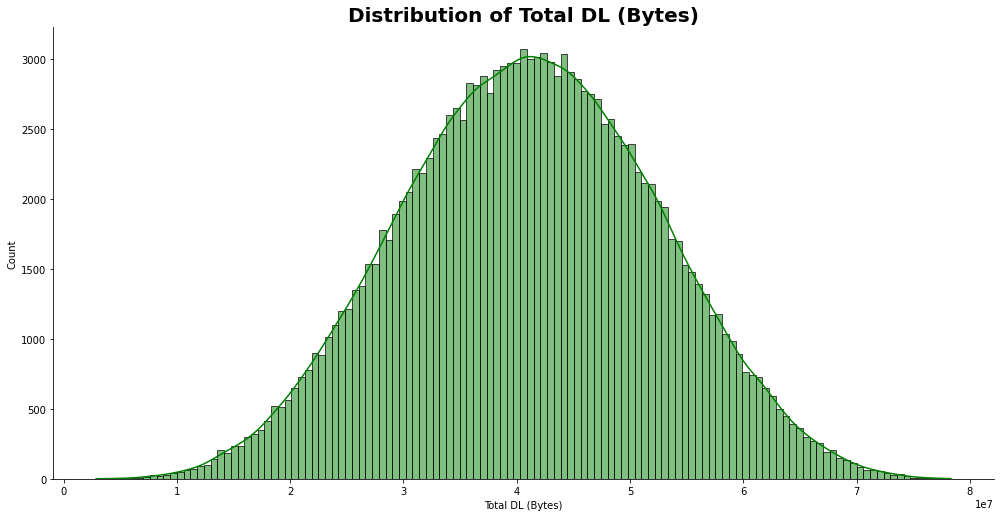

In [53]:
plot_hist(df, "Total DL (Bytes)", "green")

In [54]:
df["Total DL (Bytes)"].describe()

count    1.500010e+05
mean     4.112106e+07
std      1.127649e+07
min      2.866892e+06
25%      3.322196e+07
50%      4.114324e+07
75%      4.903424e+07
max      7.833131e+07
Name: Total DL (Bytes), dtype: float64

Non-Graphical

In [ ]:
plot_box(df, "Bearer Id", 'Bearer Id Outliers')

In [ ]:
plot_box(df, "Dur. (ms)", 'Dur. (ms) Outliers')

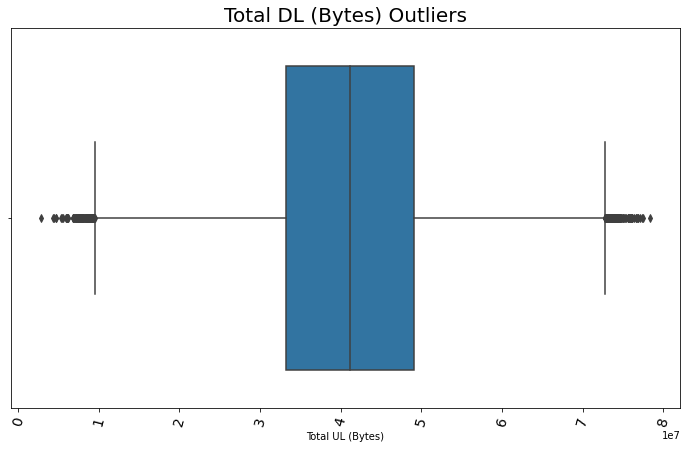

In [55]:
plot_box(df, "Total UL (Bytes)", 'Total DL (Bytes) Outliers')

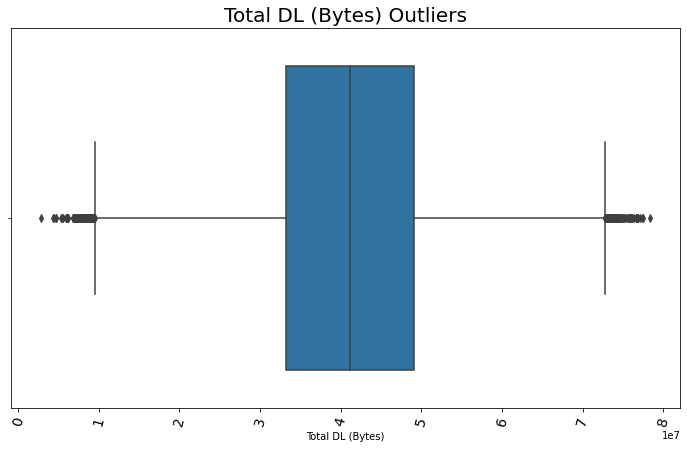

In [56]:
plot_box(df, "Total DL (Bytes)", 'Total DL (Bytes) Outliers')

In [2]:
plot_count(df, "Dur. (ms)")

NameError: ignored

categorical variables

Multivariate Analysis


This analysis is done between user location, total UL (bytes) and total DL (bytes)


In [ ]:
plot_scatter(df.head(30), x_col="MSISDN/Number", y_col="Total UL (Bytes)", hue="Last Location Name",
             style="Last Location Name", title="users vs users' location")                                   


In [ ]:
plot_box_multi(df, x_col="MSISDN/Number", y_col="Total DL (Bytes)", title="Total DL (Bytes) outilers in users' MSISDN/Number column")

Bivarate Analysis

In [ ]:
sns.scatter(df['MSISDN/Number'], df['Total DL (Bytes)'])